<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-их-подготовка-к-анализу" data-toc-modified-id="Загрузка-данных-и-их-подготовка-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и их подготовка к анализу</a></span></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ окупаемости рекламы по каналам и странам, расчет бизнес-показателей, продуктовых метрик приложения.

**Цель проекта:** разобраться в причинах неэффективности привлечения пользователей и сформулировать рекомендации для отдела маркетинга, что именно необходимо скорректировать для повышния эффективности привлечения пользователей.

**Задачи проекта:** посчитать - откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются, на основе данных выяснить какие факторы мешают привлечению клиентов.

**Исходные данные** — данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с информацией о посещениях сайта, информация о заказах за этот период, информация о рекламных расходах. 

**План работы по проекту:**  
1. Провести необходимую загрузку и предобработку данных.    
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.    
3. Составить профили пользователей, выделить платных пользователей, проанализировать источники привлечения платных пользователей.    
4. Посчитать общую сумму расходов на маркетинг с детализацией по рекламным каналам, а также CAC.   
5. Оценить окупаемость рекламы с помощью расчета показателей конверсии, LTV, ROI и CAC с учетом устройств, стран и рекламных каналов. Момент анализа - 1 ноября 2019 года.  

### 1. Загрузка данных и их подготовка к анализу

Загружаем данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Имеем файлы**

- визиты: `visits_info_short.csv`;
- заказы: `orders_info_short.csv`;
- расходы: `costs_info_short.csv`.

Изучим данные и выполним предобработку. Проверим наличие в данных пропусков и дубликатов. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Особое внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
from IPython.display import display

In [2]:
visits, orders, adv_costs = (
    pd.read_csv("C:\\Users\\user\\Desktop\\Projects\\7\\visits_info_short.csv"),  # журнал сессий
    pd.read_csv("C:\\Users\\user\\Desktop\\Projects\\7\\orders_info_short.csv"),  # покупки
    pd.read_csv("C:\\Users\\user\\Desktop\\Projects\\7\\costs_info_short.csv"),  # траты на рекламу
) 

events = None
    
display(visits.head())
display(orders.head())
display(adv_costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<AxesSubplot:>

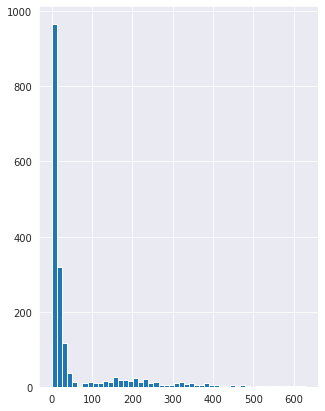

In [3]:
adv_costs['costs'].hist(bins=50, figsize=(5,7)) # строим общую гистограмму для всех рекламных расходов

In [4]:
visits = visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device' , 'Channel':'channel', 
                                'Session Start': 'session_start', 'Session End':'session_end' }) 
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt':'event_dt', 'Revenue': 'revenue', }) 
adv_costs = adv_costs.rename(columns={'Channel': 'channel'}) 

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
adv_costs['dt'] = pd.to_datetime(adv_costs['dt']).dt.date

In [6]:
print('Дубликатов посещений:', visits.duplicated().sum()) #Проверим наличие дубликатов строк
print('Дубликатов заказов:', orders.duplicated().sum())
print('Дубликатов расходов:', adv_costs.duplicated().sum())
print('_'*25, 'visits info:', '_'*25)

visits.info() # изучим информацию о типах данных в столбцах и размере датафрейма, возможных пропусках в данных 
visits.describe() #попытаемся понять, есть ли аномальные значения
print('_'*25, 'orders info:', '_'*25)
orders.info() # изучим информацию о типах данных в столбцах и размере датафрейма, возможных пропусках в данных 
orders.describe() #попытаемся понять, есть ли аномальные значения
print('_'*25, 'adv_costs info:', '_'*25)
adv_costs.info() # изучим информацию о типах данных в столбцах и размере датафрейма, возможных пропусках в данных 
adv_costs.describe() #попытаемся понять, есть ли аномальные значения


Дубликатов посещений: 0
Дубликатов заказов: 0
Дубликатов расходов: 0
_________________________ visits info: _________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
_________________________ orders info: _________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


**Подитог 1 по разделу об изучении данных и их подготовке к анализу:**  

В таблице visits 309901 строка, пропусков нет, дубликатов нет. Формат столбцов session_start, session_end приведен к формату
Datetime.    
В таблице orders 40212 строк, пропусков нет, дубликатов нет. Формат столбца event_dt приведен к формату Datetime.  
В таблице adv_costs 1800 строк, пропусков нет, дубликатов нет. Формат столбца dt приведен к формату Datetime.     
Есть аномальные значения (выбросы) столбца costs таблицы adv_costs, сильно выбивающиеся из общей массы значений этого столбца.
Рекламные расходы распеределены по трем группам: 0-60 (подавляющая часть расходов), 80-260, 300-400. Имеются отдельные значения до 630.


### 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

функции для вычисления значений метрик:

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [9]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


функции для построения графиков:

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Подитог по разделу 2:**   
Заданы следующие функции:  

get_profiles() — для создания профилей пользователей,  
get_retention() — для подсчёта Retention Rate,  
get_conversion() — для подсчёта конверсии,  
get_ltv() — для подсчёта LTV.  
filter_data() — для сглаживания данных,  
plot_retention() — для построения графика Retention Rate,  
plot_conversion() — для построения графика конверсии,  
plot_ltv_roi — для визуализации LTV и ROI.  

### 3. Исследовательский анализ данных

- Составить профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Сформулировать промежуточные выводы.

In [15]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, events, adv_costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [16]:
Max_date = profiles['dt'].max() # наибольшая дата в данных 
Min_date = profiles['dt'].min() # наименьшая дата в данных
print('Минимальная дата привлечения пользователей: ', Min_date)
print('Максимальная дата привлечения пользователей: ', Max_date)

Минимальная дата привлечения пользователей:  2019-05-01
Максимальная дата привлечения пользователей:  2019-10-27


В составленных профилях пользователей период имеющихся данных о пользователях начинается 01.05.2019 и заканчивается 27.10.2019г.

In [17]:
#Выведем информаицю о том,  из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих
#пользователей. Составим таблицу, отражающую количество пользователей и долю платящих из каждой страны по всем профайлам.
display(pd.concat([
     profiles.groupby('region').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'users_size'}), \
     profiles.query('payer==True').groupby(['region']).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payer_size'}),
     profiles.groupby('region').agg({'payer': 'mean'}).apply(lambda x: 100 * x).rename(columns={'payer': 'payer_share, %'})
    ], \
    axis=1).sort_values(by=['payer_share, %'], ascending=False))

,users_size,payer_size,"payer_share, %"
region,,,
United States,100002,6902,6.901862
Germany,14981,616,4.111875
UK,17575,700,3.982930
France,17450,663,3.799427


Приложение используют пользователи из США, Англии, Франции, Германии. Больше всего платящих пользователей из США, причем
отрыв от второго места более, чем в 5 раз.

In [18]:
#Выведем информаицю о том, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
#Составим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

display(pd.concat([
     profiles.groupby('device').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'users_size'}), \
     profiles.query('payer==True').groupby(['device']).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payer_size'}),
     profiles.groupby('device').agg({'payer': 'mean'}).apply(lambda x: 100 * x).rename(columns={'payer': 'payer_share, %'})
    ], \
    axis=1).sort_values(by=['payer_share, %'], ascending=False))


,users_size,payer_size,"payer_share, %"
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


Приложение используется на устройствах Iphone, Android, Mac, PC. Больше всего платящих пользователей на Iphone.

In [19]:
#Выведем информаицю о том, какие имеются рекламные источники привлечения и каналы, из которых пришло больше всего платящих 
#пользователей. Составим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
display(pd.concat([
  profiles.groupby('channel').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'users_size'}), \
  profiles.query('payer==True').groupby(['channel']).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'payer_size'}),
  profiles.groupby('channel').agg({'payer': 'mean'}).apply(lambda x: 100 * x).rename(columns={'payer': 'payer_share, %'})
    ], \
    axis=1).sort_values(by=['payer_share, %'], ascending=False))

,users_size,payer_size,"payer_share, %"
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Привлечение пользователей в приложение происходит по следующим рекламным каналам: FaceBoom, TipTop, organic,   
WahooNetBanner, AdNonSense, RocketSuperAds, LeapBob, OppleCreativeMedia, lambdaMediaAds, YRabbit, MediaTornado.   
Больше всего платящих пользователей привлечено через FaceBoom.

**Подитог 3 по разделу исследовательского анализа данных:**  

Составлены профили пользователей.   
- Данные о пользователях представлены за период: с 21.05.2019 г. по 27.10.2019 г.
- Приложение используют пользователи из США, Англии, Франции, Германии. Больше всего платящих пользователей из США,   
причем отрыв от второго места более, чем в 5 раз.
- Приложение используется на устройствах Iphone, Android, Mac, PC. Больше всего платящих пользователей на Iphone.
- Привлечение пользователей в приложение происходит по следующим рекламным каналам: FaceBoom, TipTop, organic,
WahooNetBanner, AdNonSense, RocketSuperAds, LeapBob, OppleCreativeMedia, lambdaMediaAds, YRabbit, MediaTornado.
Больше всего платящих пользователей привлечено через FaceBoom.

### 4. Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам (сколько денег потратили на каждый источник).
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику (на одном графике).
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника (использовать профили пользователей).

Сформулировать промежуточные выводы.

In [20]:
print(f"Общая сумма расходов на маркетинг: {adv_costs['costs'].sum(): .2f}")

Общая сумма расходов на маркетинг:  105497.30


In [21]:
display('Общая сумма расходов на маркетинг в разрезе рекламных источников: ', pd.concat([
     adv_costs.groupby('channel').agg({'costs': 'sum'}),
     adv_costs.groupby('channel').agg({'costs': 'sum'}).div(adv_costs['costs'].sum(), axis=0).\
     apply(lambda x: 100 * x).rename(columns={'costs': '%_of_total_costs'})
], \
    axis=1).sort_values(by='%_of_total_costs', ascending=False))

'Общая сумма расходов на маркетинг в разрезе рекламных источников: '

,costs,%_of_total_costs
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Если соотнести данные этого раздела с предыдущим, то видно, что через TipTop пришло примерно в 2 раза меньше платящих 
пользователей, чем через FaceBoom. Хотя расходы на TipTop существенно выше. Оба этих рекламных источника (помимо organic)
сильно выделяются среди остальных источников, как по общим расходам на них (82,6% от общих рекламных затрат приходится на эти 2 источника), так и по количеству привлеченных 
платящих/не платящих пользователей. 
В рейтинге доли платящих пользователей среди всех привлеченных TipTop (9,6%) только на 4 месте, отставая, как от 
FaceBoom (12,2%), так и от AdNonSense (11,3%) и lambdaMediaAds (10,4%). По доле платящих пользователей это лидеры среди каналов
привлечения. Канал Organic вносит существенный вклад в количество платящих пользователей и его точно нельзя игнорировать, 
хотя этот канал и имеет небольшую конверсию порядка 2%.

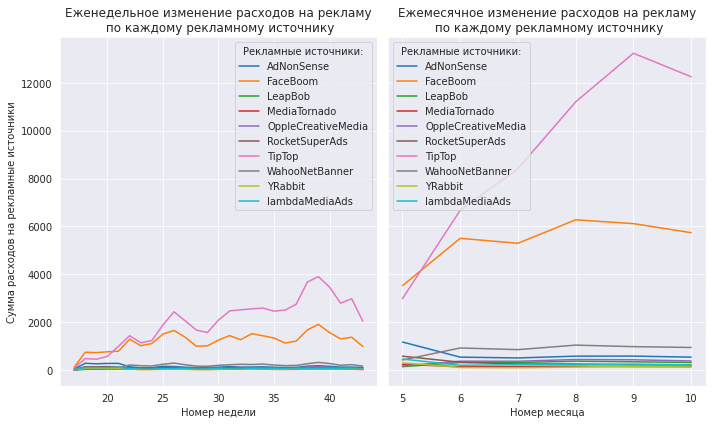

In [22]:
#Визуализируем еженедельные и ежемесячные рекламные расходы по рекламным источникам.

adv_costs['week'] = adv_costs['dt'].astype('datetime64[W]').dt.isocalendar().week
adv_costs['month'] = adv_costs['dt'].astype('datetime64[M]').dt.month

adv_week=adv_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum') #недельные расходы по каналам.
adv_month=adv_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum') #месячные расходы по каналам.
 # задаём размер сетки для графиков
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
adv_week.plot(grid=True, ax=ax1)
plt.legend(title='Рекламные источники:')
plt.xlabel('Номер недели')
plt.ylabel('Сумма расходов на рекламные источники')
plt.title('Еженедельное изменение расходов на рекламу\n по каждому рекламному источнику')
  
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
adv_month.plot(grid=True, ax=ax2)
plt.legend(title='Рекламные источники:')
plt.xlabel('Номер месяца')
plt.ylabel('Сумма расходов на рекламные источники')
plt.title('Ежемесячное изменение расходов на рекламу\n по каждому рекламному источнику')
plt.tight_layout()
plt.show()     

На графике динамики изменения расходов во времени (по неделям и месяцам) отчетливо виден рост расходов на 2 источника:
FaceBoom и TipTop, при относительно стабильных расходах по прочим источникам. С мая месяца и до сентября резко стали возрастать 
расходы по каналу Tip Top, хотя как уже ранее было отмечено, эффективность этого канала привлечения заметно ниже, чем канала FaceBoom. В октябре величина расходов на TipTop в 2 раза выше, чем на FaceBoom (12000 против 6000).


In [30]:
#Посчитаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
print(f"Cредняя стоимость привлечения одного пользователя (CAC) по всем источникам:\n \
     {profiles.groupby('channel')['acquisition_cost'].mean().mean(): .3f}")

display('Cредняя стоимость привлечения одного пользователя (CAC) по каждому источнику: ', \
        profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False))


Cредняя стоимость привлечения одного пользователя (CAC) по всем источникам:
       0.687


'Cредняя стоимость привлечения одного пользователя (CAC) по каждому источнику: '

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Как итог, мы видим, что средняя стоимость привлечения пользователя через TipTop в 2,5 раза выше, чем через FaceBoom. Это слишком большая разница, чтобы делать упор в привлечении именно через TipTop, как это происходило до октября месяца. С этой точки зрения необходимо менять структуру рекламных расходов. <br>  
При этом для канала TipTop средняя стоимость привлечения пользователя в 4,1 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  
Для канала FaceBoom средняя стоимость привлечения пользователя в 1,63 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  

**Подитог 4 по разделу маркетинга:**  

- Общая сумма расходов на маркетинг составила:  105497.30
- При анализе общей сумма расходов на маркетинг в разрезе рекламных источников выяснилось, что большая часть расходов приходится на 2 канала: TipTop и FaceBoom. Расходы на TipTop существенно выше, чем на FaceBoom. При этом через TipTop пришло примерно в 2 раза меньше платящих пользователей, чем через FaceBoom. Оба этих рекламных источника (помимо organic) сильно выделяются среди остальных источников, как по общим расходам на них (82,6% от общих рекламных затрат приходится на эти 2 источника), так и по количеству привлеченных платящих/не платящих пользователей. В рейтинге доли платящих пользователей среди всех привлеченных TipTop только на 4 месте (9,6%) , отставая, как от FaceBoom (12,2%), так и от AdNonSense (11,3%) и lambdaMediaAds (10,4%). По доле платящих пользователей это лидеры среди каналов привлечения. Канал Organic вносит существенный вклад в количество платящих пользователей и его точно нельзя игнорировать, хотя этот канал и имеет небольшую конверсию порядка 2%.
- На графике динамики изменения расходов во времени (по неделям и месяцам) отчетливо виден рост расходов на 2 источника:
FaceBoom и TipTop, при относительно стабильных расходах по прочим источникам. С мая месяца и до сентября резко стали возрастать 
расходы по каналу Tip Top, хотя как уже ранее было отмечено, эффективность этого канала привлечения заметно ниже, чем канала FaceBoom. В октябре величина расходов на TipTop в 2 раза выше, чем на FaceBoom (12000 против 6000).
- Как итог, мы видим, что средняя стоимость привлечения пользователя через TipTop в 2,5 раза выше, чем через FaceBoom. Это слишком большая разница, чтобы делать упор в привлечении именно через TipTop, как это происходило до октября месяца. С этой точки зрения необходимо менять структуру рекламных расходов. При этом для канала TipTop средняя стоимость привлечения пользователя в 4,1 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  
Для канала FaceBoom средняя стоимость привлечения пользователя в 1,63 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  

### 5. Оценка окупаемости рекламы


Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Момент анализа - 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Оценить необходимость включения в анализ данных по органическим пользователям.  
   - Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.  
   - Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.  
   - Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  
   - Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  
   - Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.  

Вопросы для изучения:   
    - Окупается ли реклама, направленная на привлечение пользователей в целом?  
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
    - Чем могут быть вызваны проблемы окупаемости?

Написать вывод, описать возможные причины обнаруженных проблем, а также написть промежуточные рекомендации для рекламного    отдела.

Так как канал organic имеет достаточно большие цифры по количеству платящих/неплатящих пользователей, то если его 
не исключить из общего анализа, он может оказать существенное влияние на итоговые результаты. По этой причине в дальнейшем 
при анализе показателей, канал organic исключен.

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,NaT,NaN,NaN,All users
4,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,NaT,NaN,NaN,All users


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.294282,0.383846,0.435026,0.514359,0.565538,0.565538,0.578333,0.603923,0.680692,0.757538,0.808718,0.872692,0.885487,0.898282
2019-05-02,323,0.324427,0.618235,0.664582,0.757276,0.803622,0.880898,0.911796,0.942693,1.004489,1.035387,1.081734,1.081734,1.112632,1.158978
2019-05-03,346,0.305751,0.452861,0.568237,0.669191,0.943468,0.986734,1.001156,1.001156,1.073266,1.116532,1.130954,1.203064,1.260751,1.304017
2019-05-04,457,0.471904,0.570175,0.624770,0.679365,0.876105,0.952538,0.974376,1.028972,1.061729,1.094486,1.127243,1.181838,1.181838,1.214595
2019-05-05,438,0.232443,0.394429,0.417215,0.462785,0.496963,0.519749,0.553927,0.588105,0.599498,0.622283,0.667854,0.679247,0.713425,0.713425


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,390,0.781590,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,323,0.714690,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,346,0.760318,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095
2019-05-04,457,0.737418,0.639941,0.773205,0.847240,0.921276,1.188071,1.291721,1.321335,1.395371,1.439792,1.484214,1.528635,1.602671,1.602671,1.647092
2019-05-05,438,0.730377,0.318251,0.540035,0.571232,0.633626,0.680421,0.711618,0.758413,0.805208,0.820806,0.852003,0.914396,0.929995,0.976790,0.976790


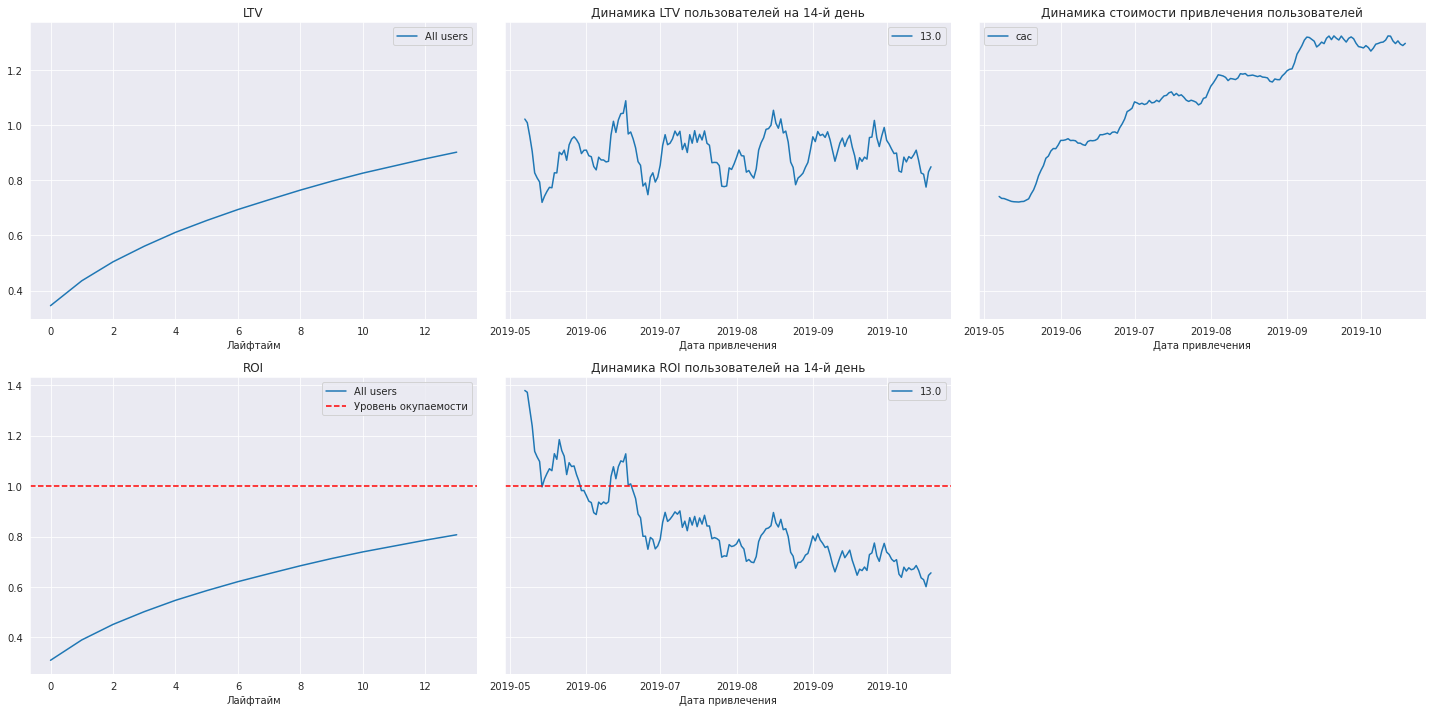

In [26]:
# считаем LTV и ROI
horizon_days = 14  # горизонт анализа 14 дней, т.к. бизнес-план оценивает окупаемость через 14 дней. 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days
)

display(ltv_raw.head())
display(ltv_grouped.head())
display(ltv_history.head())
display(roi_grouped.head())
display(roi_history.head())

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV стабильно колеблется в диапазоне 0,6-0,8 примерно с месячным циклом. Динамика в течение рассматриваемого периода   
существенно не менялась.   
CAC резко начал расти с конца мая, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. Здесь прослеживается прямая связь.  
Реклама за рассматриваемый период не окупается. ROI в конце 2 недельного периода —  80,7%. Динамика ROI стала резко ухудшаться   
с июня месяца. По текущей ситуации - тренд на дальнейшее снижение.

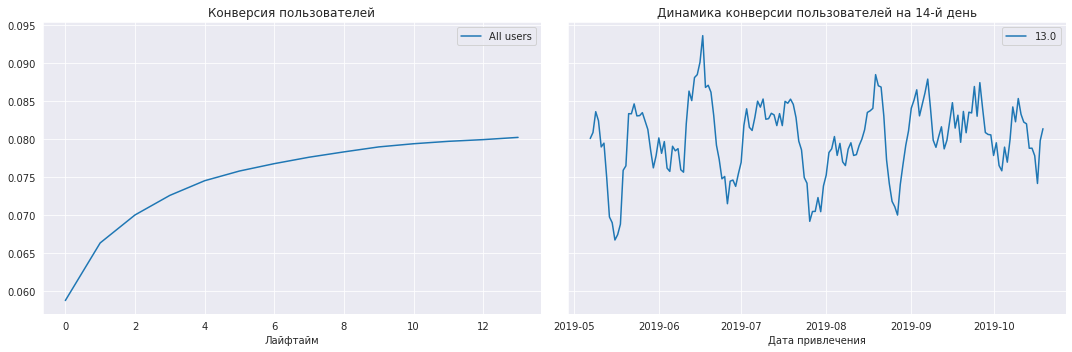

In [27]:
#Построим и изучим графики конверсии и удержания пользователей, а также их динамику.


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


В целом конверсия на 14 день составляет 5,7%. При этом по динамике было резкое ускорение роста конверсии в конце мая, а затем  
конверсия стала стабильно колебаться в диапазоне 0,05-0,066.

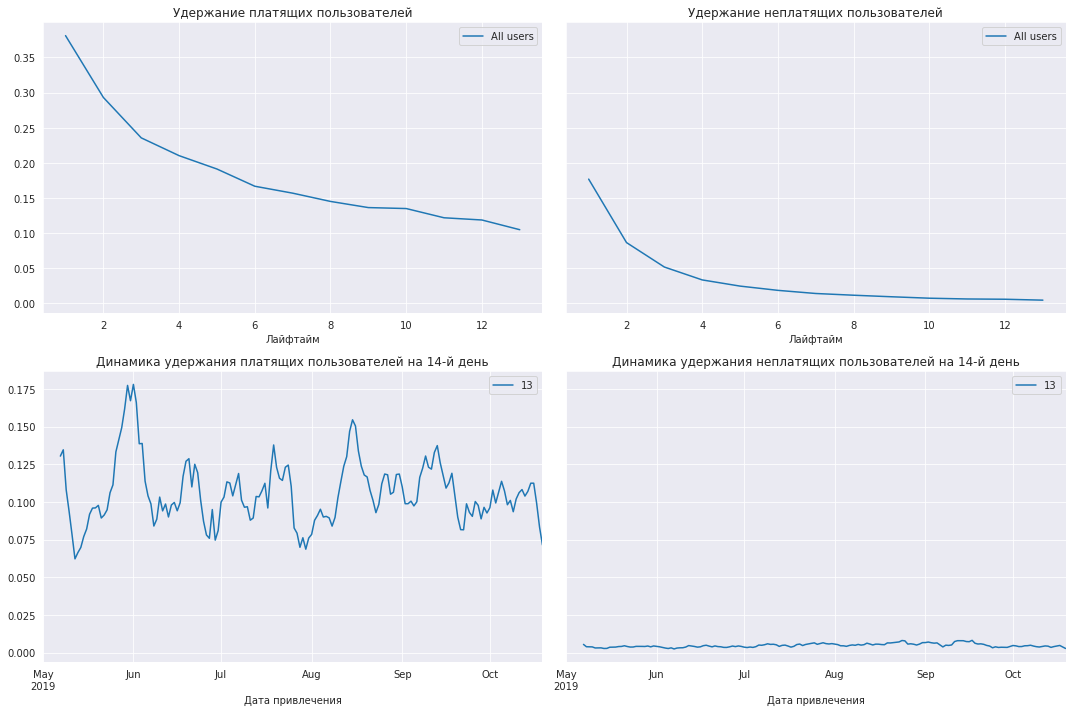

In [28]:
# рассмотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic"'), visits, datetime(2019, 11, 1).date(), horizon_days
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание неплатящих пользователей существенно ниже платящих. к 14 дню удержание платящих пользователей составляет   
порядка 12%, неплатящих порядка 1%.

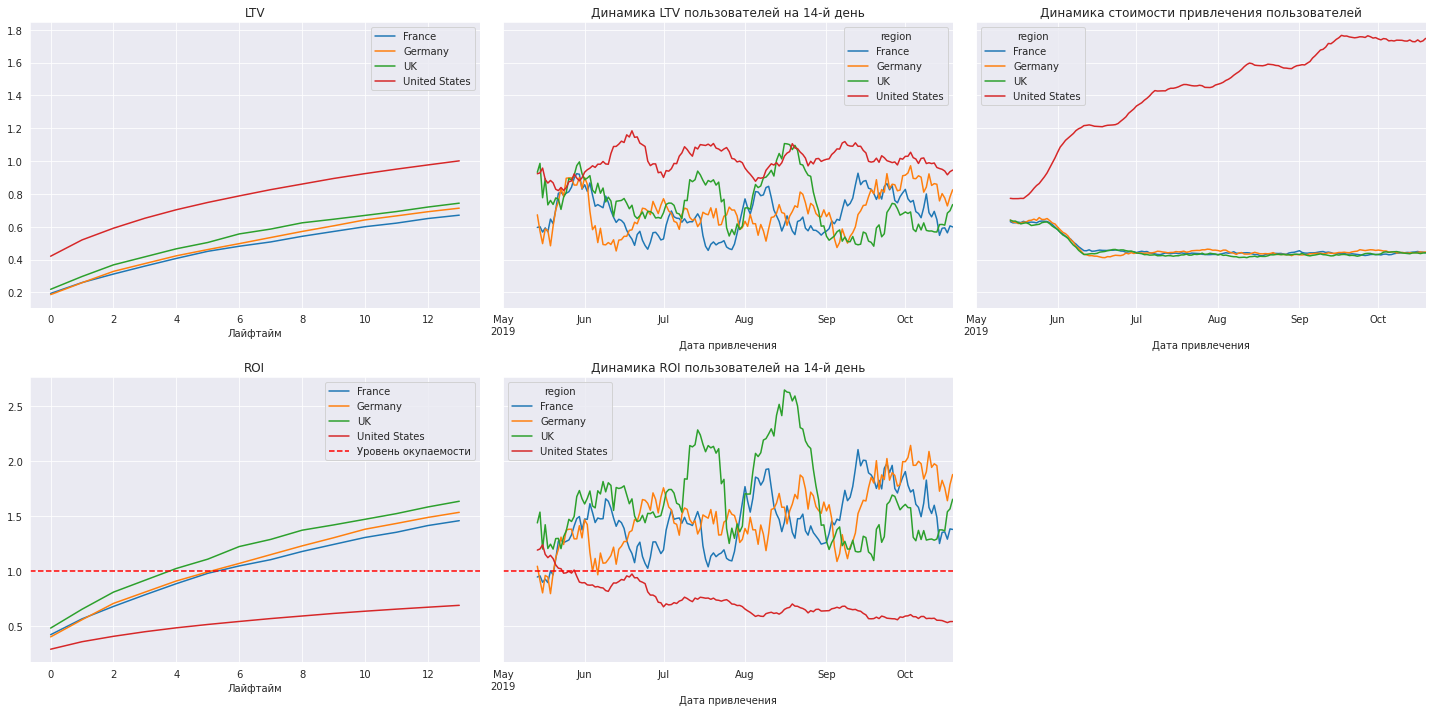

In [29]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV более-менее стабилен.  
CAC резко начал расти с конца мая только в США, когда стали резко возрастать расходы по рекламному каналу TipTop,   
и немного по каналу FaceBoom. В других странах САС снижается.  
Реклама за рассматриваемый период не окупается только в США. Лучше всего окупается Англия и Германия. 
В США окупаемость на 14 день продолжает снижаться.  

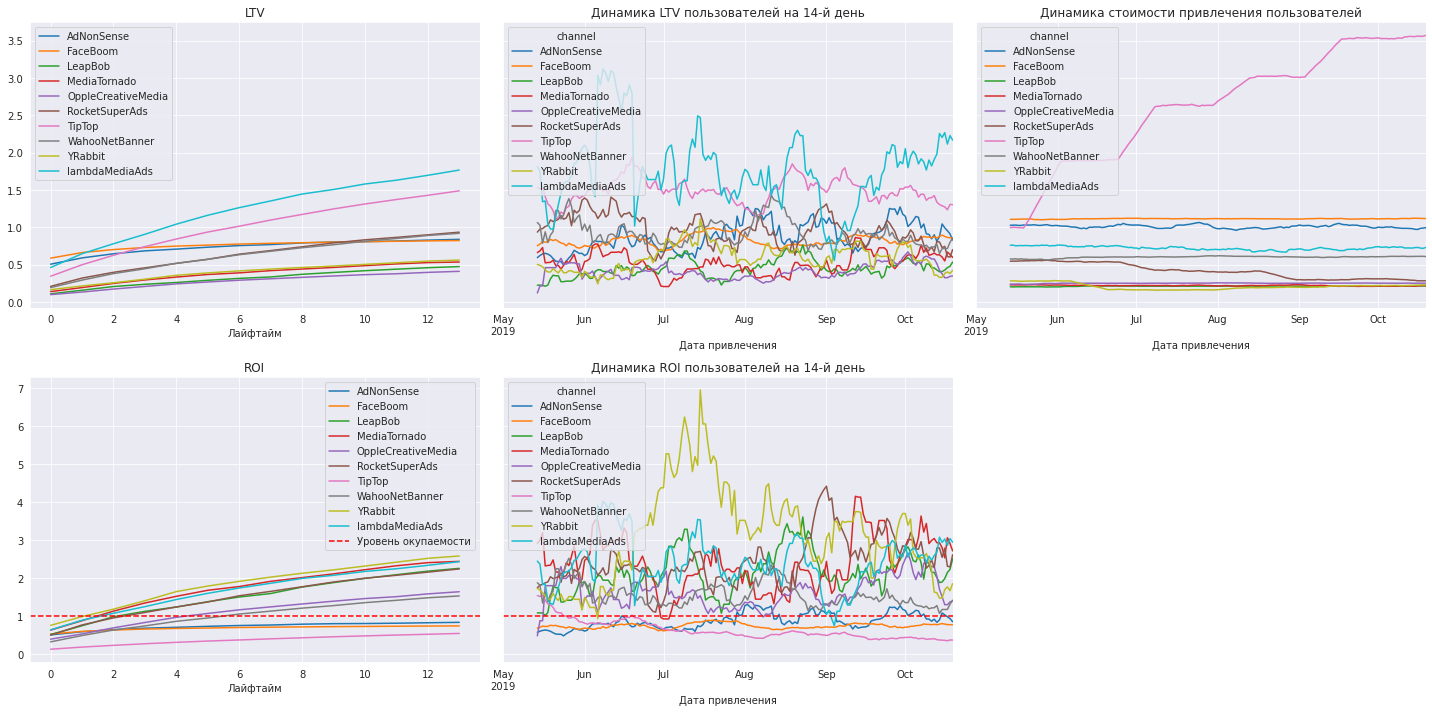

In [30]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV более-менее стабилен.  
CAC резко начал расти с конца мая только в канале TipTop. В других каналах САС стабилен.  
Реклама за рассматриваемый период не окупается только для TipTop, FaceBoom, AdNonSense. Лучше всего окупается YRabbit,     
MediaTornado и lambdaMediaAds.  

Смотрим окупаемость с разбивкой по источникам привлечения отдельно по США:

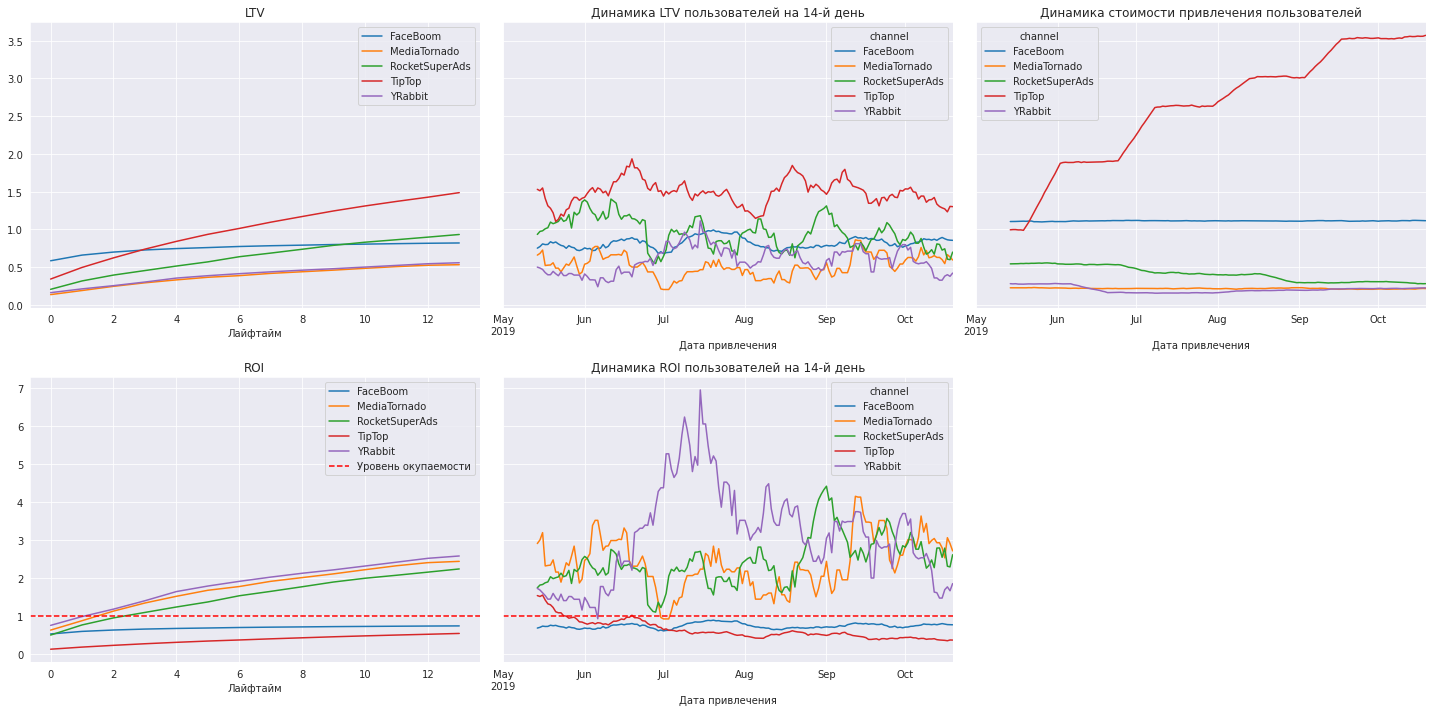

In [31]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic" and region=="United States"'), orders, datetime(2019, 11, 1).date(), \
    horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Для региона США: LTV более-менее стабилен.
CAC резко начал расти с в канале TipTop с мая. В других каналах САС стабилен.
Реклама за рассматриваемый период не окупается только для TipTop, FaceBoom. Лучше всего окупается YRabbit,
MediaTornado и lambdaMediaAds.

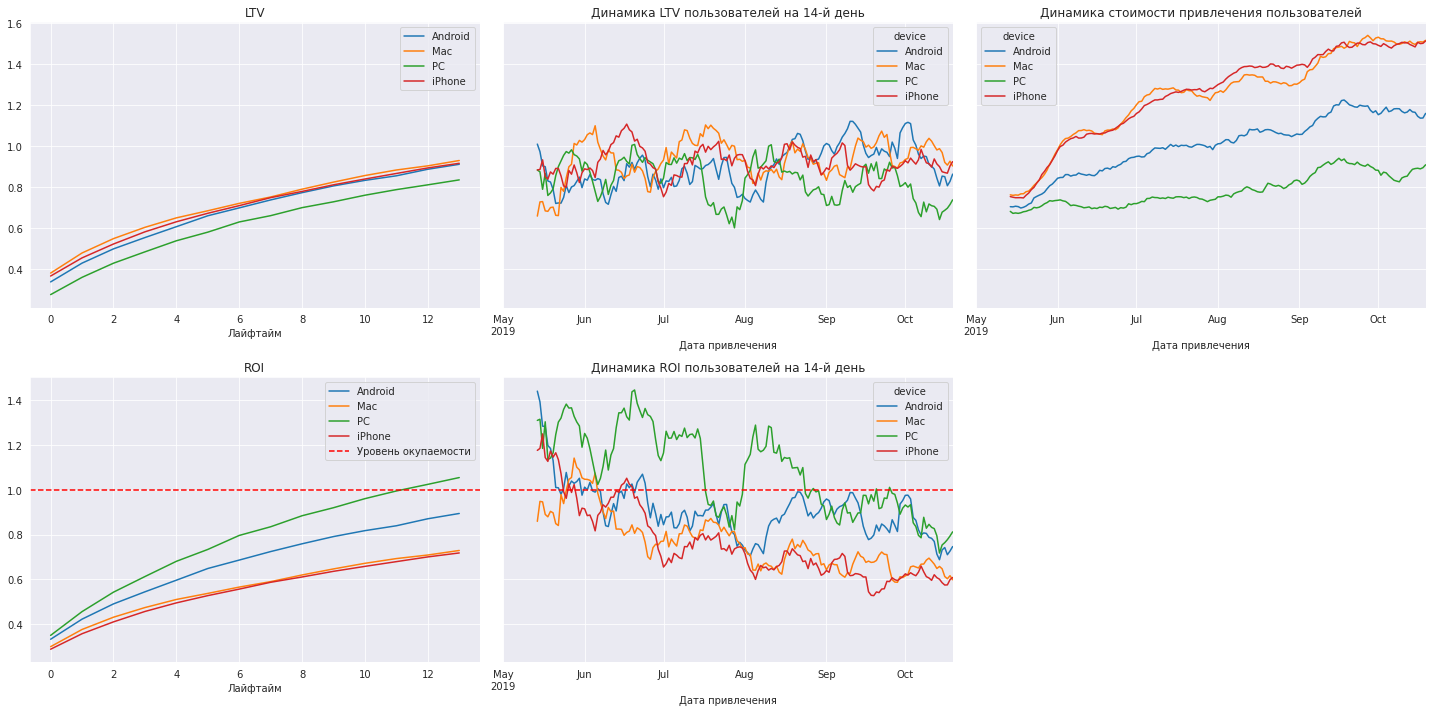

In [32]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV более-менее стабилен.  
CAC резко начал расти с конца мая по всем устройствам. Самый высокий у Iphone и Mac.  
Реклама за рассматриваемый период не окупается нигде, кроме PC. Динамика окупаемости отрицательна.  

Посмотрим окупаемость с разбивкой по устройствам отдельно по США:

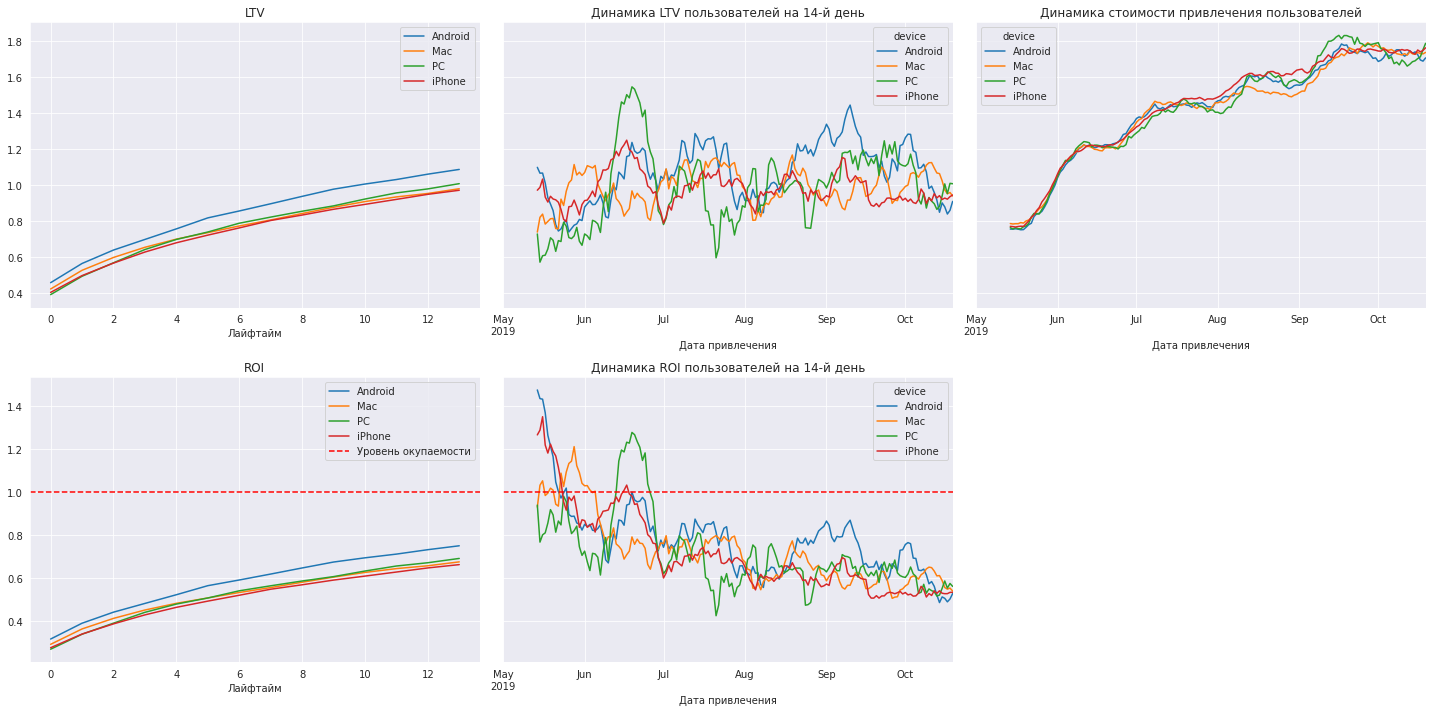

In [33]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic" and region=="United States"'), orders, \
    datetime(2019, 11, 1).date(), horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Для региона США: LTV более-менее стабилен.  
CAC резко начал расти с конца мая по всем устройствам. 
Реклама за рассматриваемый период не окупается ни на каких устройствах. Динамика окупаемости на 14 день отрицательна.  


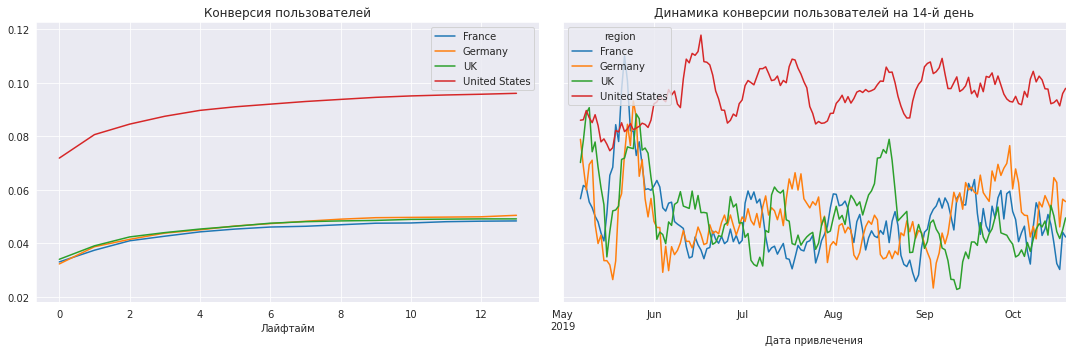

In [34]:
#смотрим конверсию с разбивкой по странам
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США конвертируются хорошо. Динамика конверсии сильно не менялась за рассматриваемый период.

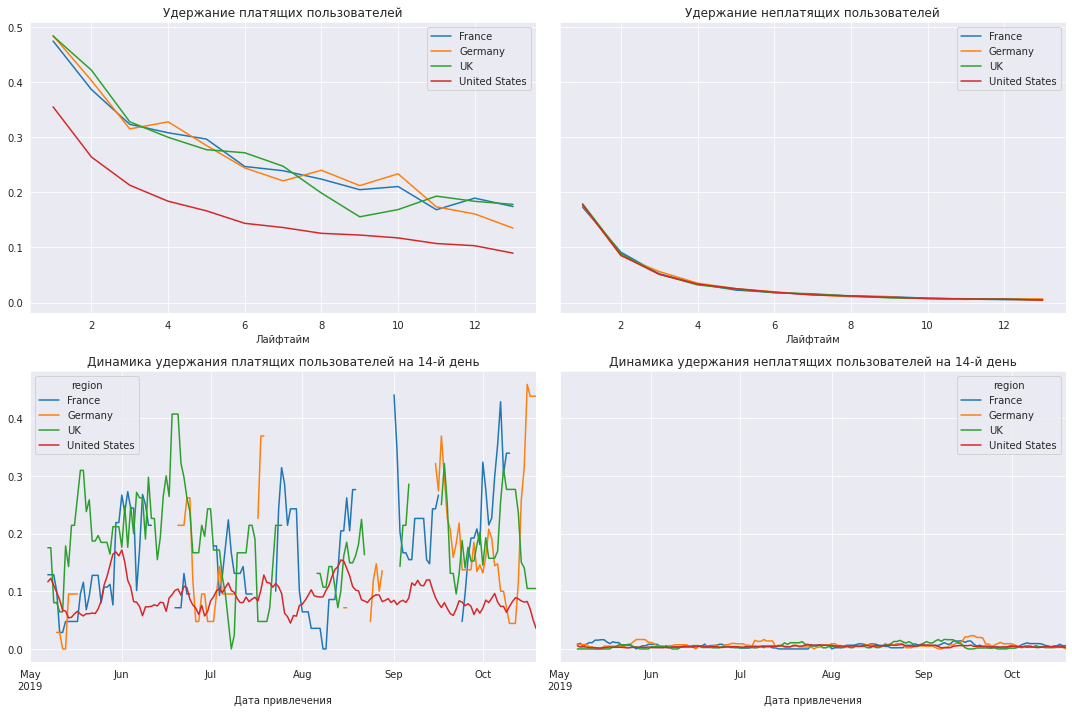

In [35]:
# смотрим удержание с разбивкой по странам
dimensions=['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic"'), visits, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

График удержания по всем странам примерно одинаков. Но в США удержание самое низкое и имеет тенденцию   
к снижению показателя на 14 день.

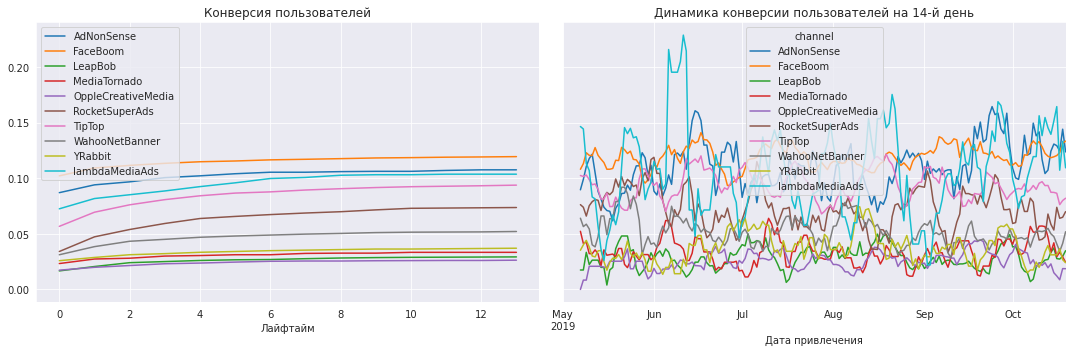

In [36]:
#смотрим конверсию с разбивкой по каналам:
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия каналов разная. Лучше всего она в каналах: FaceBoom, AdNoNSense, lambdaMediaAds, TipTop.
Хуже всего конверсия у каналов: YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.

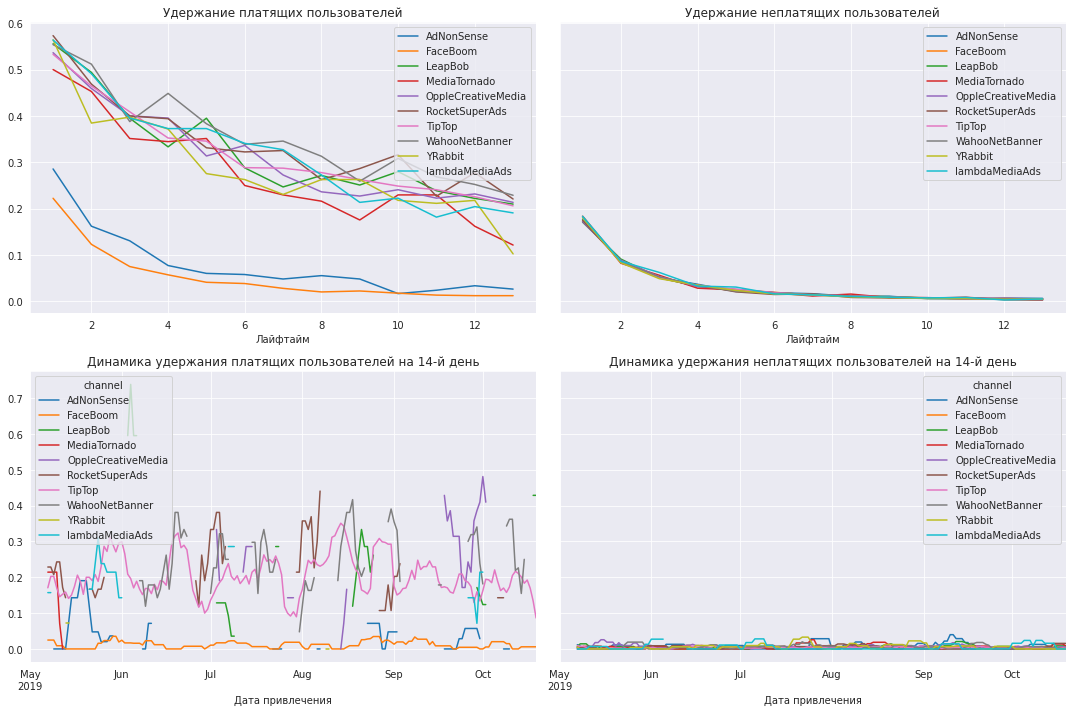

In [37]:
# смотрим удержание с разбивкой по каналам:
dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic"'), visits, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей схоже себя ведет по всем каналам, кроме  FaceBoom, AdNoNSense. По этим двум каналам удержание По этим двум каналам удержание заметно ниже (почти в 2 раза).

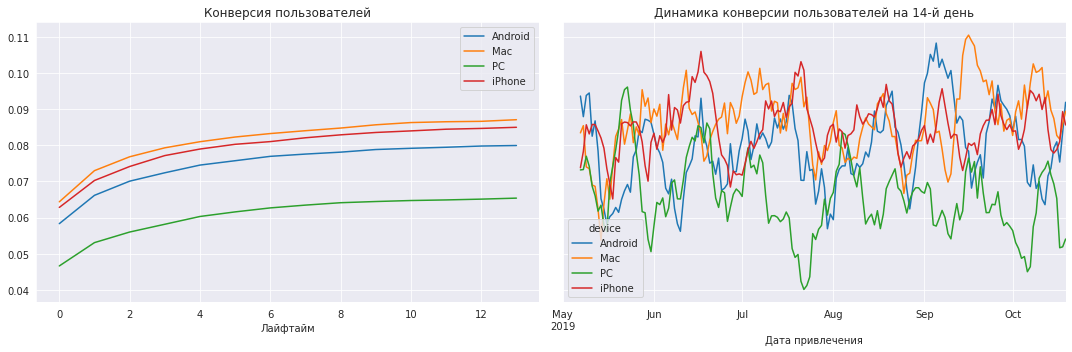

In [38]:
#смотрим конверсию с разбивкой по устройствам:
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic"'), orders, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: Конверсия схожая на всех устройствах, кроме PC. На PC конверсия заметно ниже.

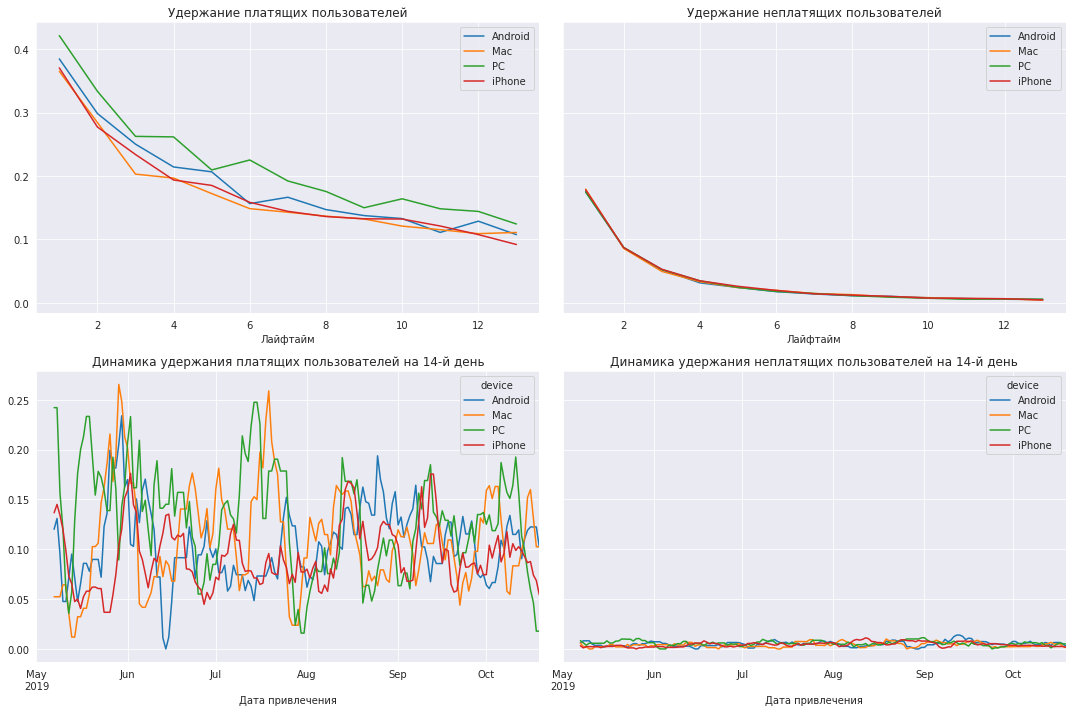

In [39]:
# смотрим удержание с разбивкой по устройствам:
dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic"'), visits, datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

Комментарий: Сильных отклонений по удержанию на устройствах нет. Чуть лучше платящие пользователи удерживаются на PC.


Далее посмотрим конверсию и удержание пользователей в США с разбивкой по устройствам и каналам.

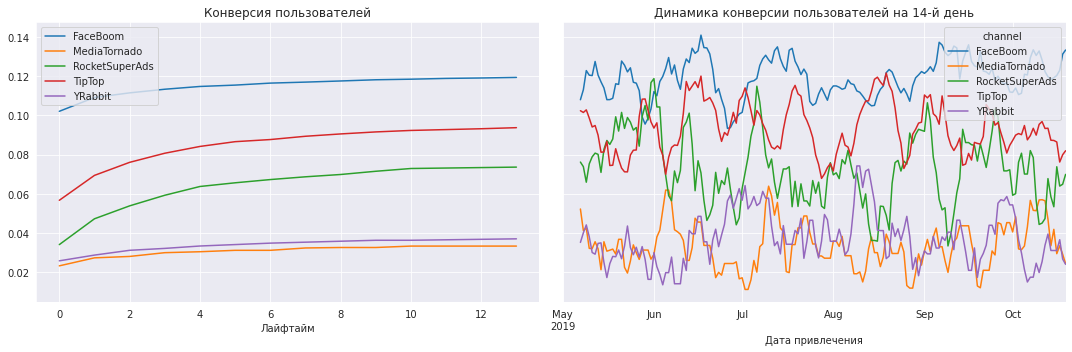

In [40]:
#смотрим конверсию с разбивкой по каналам только для пользователей из США:
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic" and region=="United States"'), orders, \
    datetime(2019, 11, 1).date(), horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: Для региона США: конверсия каналов разная. Явный лидер - FaceBoom. Немного хуже конверсия у TipTop и RocketSuperAds. Хуже всего (причем в 2-3 раза) кноверсия у каналов: YRabbit, MediaTornado.

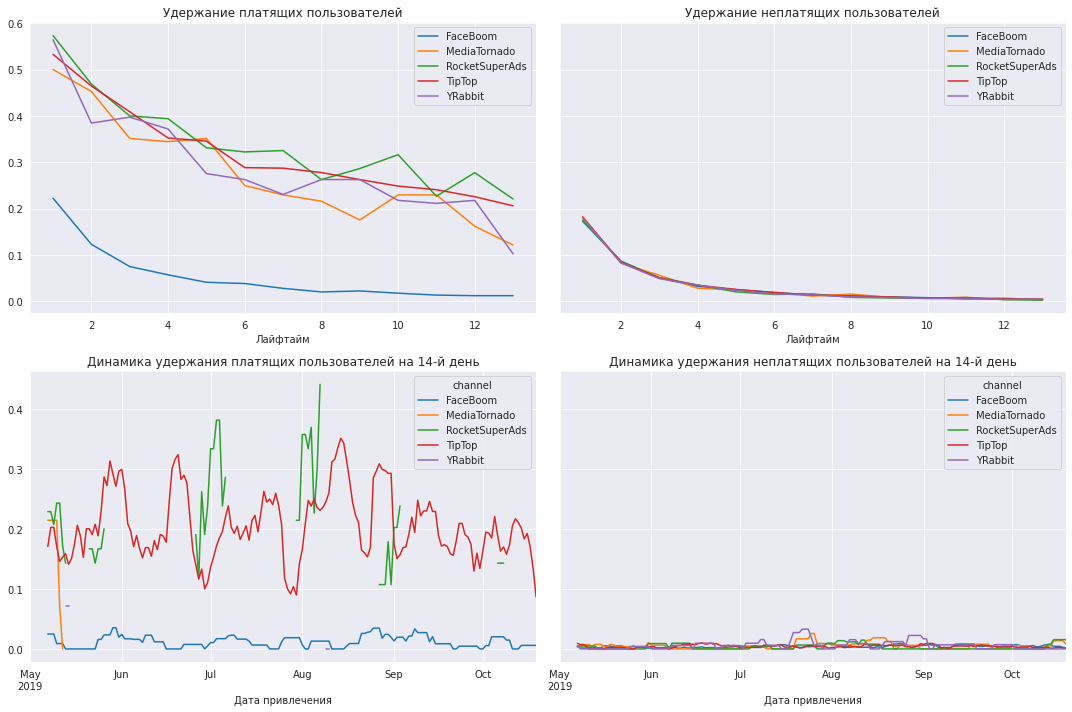

In [41]:
# смотрим удержание с разбивкой по каналам только для пользователей из США:
dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic" and region=="United States"'), visits, datetime(2019, 11, 1).date(), \
    horizon_days, dimensions = dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

Комментарий: Для региона США: Самое низкое удержание платящих пользователей у FaceBoom. По остальным каналам удержание мало чем отличается друг от друга. YRabbit имеет резкое падение удержания платящих пользователей с 12 по 14 день.

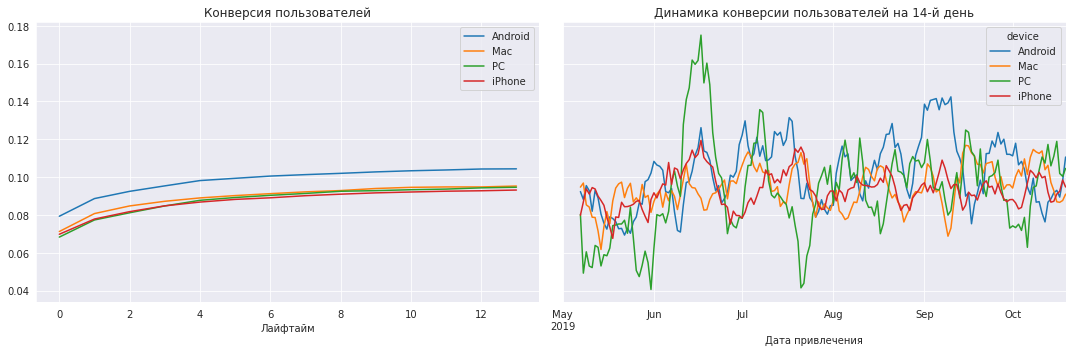

In [42]:
#смотрим конверсию с разбивкой по устройствам только для пользователей из США:
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic" and region=="United States"'), orders, datetime(2019, 11, 1).date(), \
    horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Комментарий: Для региона США: самая высокая конверсия на устройствах Android.

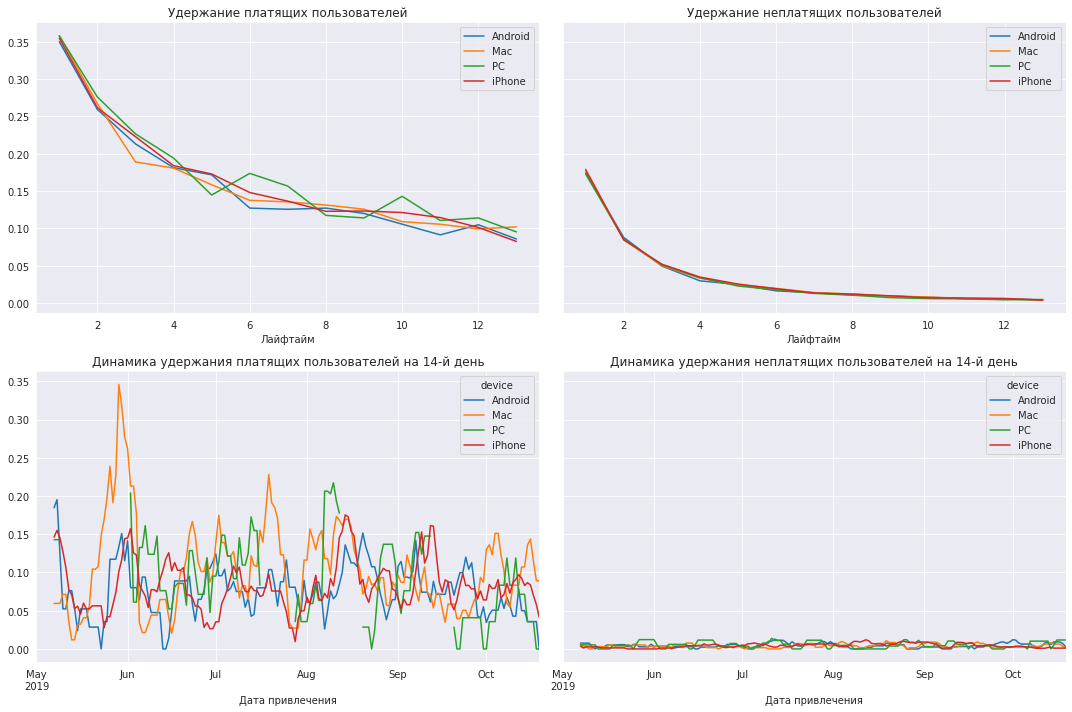

In [43]:
# смотрим удержание с разбивкой по устройствам только для пользователей из США:
dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic" and region=="United States"'), visits, datetime(2019, 11, 1).date(), \
    horizon_days, dimensions = dimensions
)
    
plot_retention(retention_grouped, retention_history, horizon_days) 

Комментарий: Для региона США: удержание по устройствам  друг от друга в целом не отличается.

Комментарии к вопросам для изучения:
- Окупается ли реклама, направленная на привлечение пользователей в целом? Реклама за рассматриваемый период не окупается.
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? Самое негативное
влияние на окупаемость рекламы оказывает тот факт, что расходы в основном производились для каналов TipTop и FaceBoom,
которые имеют самый высокий показатель стоимости привлечения одного пользователя. С учетом того факта, что огромная доля 
пользователей из США, то и в разрезе стран, рекалама не окупилась именно там. Хотя конверсия в США является самой большой. 
В США, видимо, небоходимо использовать другие каналы, которые имеют меньшую стоимостью привлечения одного пользователя. По текущим показателям, стоимость привлечения в рекламном канале не должна превышать 0,7-0,8, чтобы расходы окупились. <br>
Рекомендованы для США каналы: lambdaMediaAds - как с точки зрения окупаемости, так и по показателям конверсии и удержания пользователей. В остальных регионах реклама окупается в текущих источниках.   <br>
- Чем могут быть вызваны проблемы окупаемости? В основном проблема связана с показателем CAC в США. CAC резко начал расти 
с конца мая, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. Здесь прослеживается прямая связь с проблемой окупаемости расходов на рекламу. Необходимо пересмотреть структуру рекламных 
расходов, как указано в предыдущем комментарии.

**Подитог 5 по разделу Оценка окупаемости рекламы:**

Так как канал organic имеет достаточно большие цифры по количеству платящих/неплатящих пользователей, то если его не исключить из общего анализа, он может оказать существенное влияние на итоговые результаты. По этой причине в дальнейшем при анализе показателей, канал organic исключен.  
горизонт анализа 14 дней, т.к. бизнес-план оценивает окупаемость через 14 дней.  
LTV стабильно колеблется в диапазоне 0,6-0,8 примерно с месячным циклом. Динамика в течение рассматриваемого периода существенно не менялась.  
CAC резко начал расти с конца мая, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. Здесь прослеживается прямая связь.  
Реклама за рассматриваемый период не окупается. ROI в конце 2 недельного периода — 80,7%. Динамика ROI стала резко ухудшаться с июня месяца. По текущей ситуации - тренд на дальнейшее снижение.  
В целом конверсия на 14 день составляет 5,7%. При этом по динамике было резкое ускорение роста конверсии в конце мая, а затем конверсия стала стабильно колебаться в диапазоне 0,05-0,066. При этом пользователи из США конвертируются существенно лучше, чем пользователи из других стран.  
Удержание неплатящих пользователей существенно ниже платящих. к 14 дню удержаение платящих пользователей составляет порядка 12%, неплатящих порядка 1%. График удержания по всем странам примерно одинаков. Но в США удержание самое низкое и имеет тенденцию к снижению показателя на 14 день.  
Анализ окупаемости по странам: LTV более-менее стабилен. CAC резко начал расти с конца мая только в США, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. В других странах САС снижается. Реклама за рассматриваемый период не окупается только в США. Лучше всего окупается Англия и Германия. В США окупаемость на 14 день продолжает снижаться.  
Анализ окупаемости по каналам: LTV более-менее стабилен. CAC резко начал расти с конца мая только в канале TipTop. В других каналах САС стабилен. Реклама за рассматриваемый период не окупается только для TipTop, FaceBoom, AdNonSense. Лучше всего окупается YRabbit, MediaTornado и lambdaMediaAds.  
Анализ окупаемости по устройствам: LTV более-менее стабилен. CAC резко начал расти с конца мая по всем устройствам. Самый высокий у Iphone и Mac. Реклама за рассматриваемый период не окупается нигде, кроме PC. Динамика окупаемости отрицательна.    
При рассмотрении конверсии по каналам, увидели, что конверсия по каналам разная. Лучше всего она в каналах: FaceBoom, AdNoNSense, lambdaMediaAds, TipTop. Хуже всего конверсия у каналов: YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.  
При рассмотрении удержания по каналам, увидели, что удержание  платящих пользователей схоже себя ведет по всем каналам, кроме FaceBoom, AdNoNSense. По этим двум каналам удержание заметно ниже (почти в 2 раза).   


Рекомендованы для США каналы: lambdaMediaAds - как с точки зрения окупаемости, так и по показателям конверсии и удержания пользователей. В остальных регионах реклама окупается в текущих источниках. 


### 6. Общий вывод

<div style="border:solid Chocolate 2px; padding: 40px">

**1. Результат исследовательского анализа данных:**  

Составлены профили пользователей.   
- Данные о пользователях представлены за период: с 21.05.2019 г. по 27.10.2019 г.
- Приложение используют пользователи из США, Англии, Франции, Германии. Больше всего платящих пользователей из США,   
причем отрыв от второго места более, чем в 5 раз.
- Приложение используется на устройствах Iphone, Android, Mac, PC. Больше всего платящих пользователей на Iphone.
- Привлечение пользователей в приложение происходит по следующим рекламным каналам: FaceBoom, TipTop, organic,
WahooNetBanner, AdNonSense, RocketSuperAds, LeapBob, OppleCreativeMedia, lambdaMediaAds, YRabbit, MediaTornado.
Больше всего платящих пользователей привлечено через FaceBoom.


**2. Маркетинг:**  

- Общая сумма расходов на маркетинг составила:  105497.30
- При анализе общей сумма расходов на маркетинг в разрезе рекламных источников выяснилось, что большая часть расходов приходится на 2 канала: TipTop и FaceBoom. Расходы на TipTop существенно выше, чем на FaceBoom. При этом через TipTop пришло примерно в 2 раза меньше платящих пользователей, чем через FaceBoom. Оба этих рекламных источника (помимо organic) сильно выделяются среди остальных источников, как по общим расходам на них (82,6% от общих рекламных затрат приходится на эти 2 источника), так и по количеству привлеченных платящих/не платящих пользователей. В рейтинге доли платящих пользователей среди всех привлеченных TipTop только на 4 месте (9,6%) , отставая, как от FaceBoom (12,2%), так и от AdNonSense (11,3%) и lambdaMediaAds (10,4%). По доле платящих пользователей это лидеры среди каналов привлечения. Канал Organic вносит существенный вклад в количество платящих пользователей и его точно нельзя игнорировать, хотя этот канал и имеет небольшую конверсию порядка 2%.
- На графике динамики изменения расходов во времени (по неделям и месяцам) отчетливо виден рост расходов на 2 источника:
FaceBoom и TipTop, при относительно стабильных расходах по прочим источникам. С мая месяца и до сентября резко стали возрастать 
расходы по каналу Tip Top, хотя как уже ранее было отмечено, эффективность этого канала привлечения заметно ниже, чем канала FaceBoom. В октябре величина расходов на TipTop в 2 раза выше, чем на FaceBoom (12000 против 6000).
- Как итог, мы видим, что средняя стоимость привлечения пользователя через TipTop в 2,5 раза выше, чем через FaceBoom. Это слишком большая разница, чтобы делать упор в привлечении именно через TipTop, как это происходило до октября месяца. С этой точки зрения необходимо менять структуру рекламных расходов. При этом для канала TipTop средняя стоимость привлечения пользователя в 4,1 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  
Для канала FaceBoom средняя стоимость привлечения пользователя в 1,63 раза больше, чем общая средняя стоимость привлечения одного пользователя по всем каналам.  


**3. Оценка окупаемости рекламы**
- Так как канал organic имеет достаточно большие цифры по количеству платящих/неплатящих пользователей, то если его не исключить из общего анализа, он может оказать существенное влияние на итоговые результаты. По этой причине в дальнейшем при анализе показателей, канал organic исключен.
- горизонт анализа 14 дней, т.к. бизнес-план оценивает окупаемость через 14 дней.
- LTV стабильно колеблется в диапазоне 0,6-0,8 примерно с месячным циклом. Динамика в течение рассматриваемого периода
существенно не менялась.
- CAC резко начал расти с конца мая, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. Здесь прослеживается прямая связь.
- Реклама за рассматриваемый период не окупается. ROI в конце 2 недельного периода — 80,7%. Динамика ROI стала резко ухудшаться
с июня месяца. По текущей ситуации - тренд на дальнейшее снижение.
- В целом конверсия на 14 день составляет 5,7%. При этом по динамике было резкое ускорение роста конверсии в конце мая, а затем  конверсия стала стабильно колебаться в диапазоне 0,05-0,066. При этом пользователи из США конвертируются существенно лучше, чем пользователи из других стран. 
- Удержание неплатящих пользователей существенно ниже платящих. к 14 дню удержаение платящих пользователей составляет
порядка 12%, неплатящих порядка 1%. График удержания по всем странам примерно одинаков. Но в США удержание самое низкое и имеет тенденцию к снижению показателя на 14 день.
- Анализ окупаемости по странам:
   LTV более-менее стабилен. CAC резко начал расти с конца мая только в США, когда стали резко возрастать расходы по рекламному каналу TipTop, и немного по каналу FaceBoom. В других странах САС снижается. Реклама за рассматриваемый период не окупается только в США. Лучше всего окупается Англия и Германия. В США окупаемость на 14 день продолжает снижаться.  
- Анализ окупаемости по каналам:
  LTV более-менее стабилен. CAC резко начал расти с конца мая только в канале TipTop. В других каналах САС стабилен. Реклама за рассматриваемый период не окупается только для TipTop, FaceBoom, AdNonSense. Лучше всего окупается YRabbit, MediaTornado и lambdaMediaAds.
- Анализ окупаемости по устройствам:
 LTV более-менее стабилен. CAC резко начал расти с конца мая по всем устройствам. Самый высокий у Iphone и Mac. Реклама за рассматриваемый период не окупается нигде, кроме PC. Динамика окупаемости отрицательна.  

 При рассмотрении конверсии по каналам, увидели, что конверсия по каналам разная. Лучше всего она в каналах: FaceBoom, AdNoNSense, lambdaMediaAds, TipTop. Хуже всего конверсия у каналов: YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.  
 При рассмотрении удержания по каналам, увидели, что удержание  платящих пользователей схоже себя ведет по всем каналам, кроме FaceBoom, AdNoNSense. По этим двум каналам удержание заметно ниже (почти в 2 раза).   


**Рекомендации:**  
Самое негативное влияние на окупаемость рекламы оказывает тот факт, что расходы в основном производились по каналам TipTop и FaceBoom, которые имеют самый высокий показатель стоимости привлечения одного пользователя. С учетом того факта, что огромная доля пользователей из США, то и в разрезе стран, рекалама не окупилась именно там. Хотя конверсия в США является самой большой, но при этом имеет слабое удержание платящих пользователей.
В США, видимо, небоходимо использовать другие каналы, которые имеют меньшую стоимостью привлечения одного пользователя. По текущим показателям, стоимость привлечения в рекламном канале в США не должна превышать 0,7-0,8, чтобы расходы окупились.   


Рекомендованы для США каналы: lambdaMediaAds - как с точки зрения окупаемости, так и по показателям конверсии и удержания пользователей. В остальных регионах реклама окупается в текущих источниках.   

При этом так как каналы TipTop и FaceBoom не окупаются, то использовать их дальше смысла не имеет, без изменения показателей конверсии и удержания. </div>